# Pymaceuticals Inc. Drug Study

* The drug Capomulin actually seems to treat the specific cancer being assessed. In particular the total reduction in tumor volume out-performed all but one other drug.
* The drug Capomulin has the highest survival rate of the four drugs considered in the plots.
* The drug Capomulin seems to slow the creation of metastatic sites.


In [1]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge( mouse_data, trial_data, on='Mouse ID' ) 

# Display the data table for preview
data.head(5)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
response_series = data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
response_mean = pd.DataFrame(response_series).reset_index()

# Preview DataFrame
response_mean.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
response_series = data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
response_error = pd.DataFrame(response_series).reset_index()

# Preview DataFrame
response_error.head(5)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tmp1 = response_mean.groupby(['Timepoint'])
tmp2 = response_error.groupby(['Timepoint'])
drugs_mean = tmp1.apply(lambda x : x.set_index('Drug').transpose().iloc[1])
drugs_error = tmp2.apply(lambda x : x.set_index('Drug').transpose().iloc[1])

# Preview that Reformatting worked
drugs_mean.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


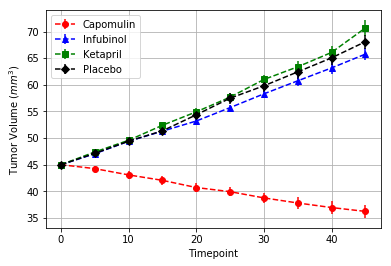

In [5]:

drug_marks = [ 
    ('Capomulin', 'o', 'red'), 
    ('Infubinol', '^', 'blue'), 
    ('Ketapril', 's', 'green'), 
    ('Placebo','D', 'black')
]

for drug, mark, color in drug_marks:
    plt.errorbar(drugs_mean.index, drugs_mean[drug], drugs_error[drug], 
                 label=drug, marker=mark, color=color, linestyle='--')

plt.grid()
plt.ylabel('Tumor Volume ($mm^3$)')
plt.xlabel('Timepoint')
plt.legend()

# Save the Figure
plt.savefig('tumor-volumn_vs_timepoint-errorbars.png')
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#Metastatic Sites
response_series = data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
meta_means = pd.DataFrame(response_series).reset_index()

# Preview DataFrame
meta_means.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
response_series = data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
meta_errors = pd.DataFrame(response_series).reset_index()

# Preview DataFrame
meta_errors.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
tmp1 = meta_means.groupby(['Timepoint'])
tmp2 = meta_errors.groupby(['Timepoint'])
drugs_meta_mean = tmp1.apply(lambda x : x.set_index('Drug').transpose().iloc[1])
drugs_meta_error = tmp2.apply(lambda x : x.set_index('Drug').transpose().iloc[1])

# Preview that Reformatting worked
drugs_meta_mean.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


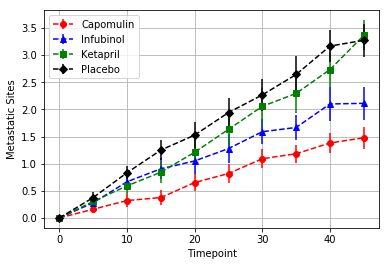

In [9]:
# Generate the Plot (with Error Bars)
for drug, mark, color in drug_marks:
    plt.errorbar(drugs_meta_mean.index, drugs_meta_mean[drug], drugs_meta_error[drug], 
                 label=drug, marker=mark, color=color, linestyle='--')

plt.grid()
plt.ylabel('Metastatic Sites')
plt.xlabel('Timepoint')
plt.legend()

# Save the Figure
plt.savefig('metastatic_vs_timepoint-errorbars.png')
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
response_series = data.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

# Convert to DataFrame
response_count = pd.DataFrame(response_series).reset_index()
response_count = response_count.rename(
    columns={'Mouse ID': 'Mouse Count'}, index=str )

# Preview DataFrame
response_count.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
tmp = response_count.groupby(['Timepoint'])
drugs_count = tmp.apply(lambda x : x.set_index('Drug').transpose().iloc[1])
 
# Preview the Data Frame
drugs_count.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


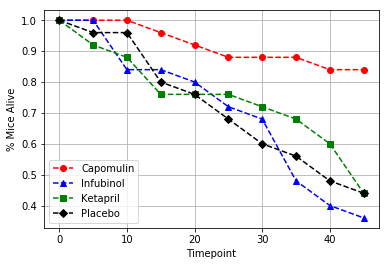

In [12]:
# Generate the Plot (Accounting for percentages)

for drug, mark, color in drug_marks:
    plt.plot(drugs_count.index, drugs_count[drug]/25.0,
                 label=drug, marker=mark, color=color, linestyle='--')

plt.grid()
plt.ylabel('% Mice Alive')
plt.xlabel('Timepoint')
plt.legend()

# Save the Figure
plt.savefig('surv-rate_percentages.png')
plt.show()

## Summary Bar Graph

In [13]:

# determine the initial and final observed values for each mice in the trial (assuming they survived)
initial_vals = data.loc[ data['Timepoint'] == 0 ]
final_vals = data.loc[ data['Timepoint'] == 45 ]

# combine the inital and final tables, removing entries for mice that died during the 
combined = pd.merge(initial_vals, final_vals, on='Mouse ID', how='inner')
del combined['Drug_y']

means = combined.groupby('Drug_x').mean()
pct_change = 100.0*(means['Tumor Volume (mm3)_y'] - means['Tumor Volume (mm3)_x'])/means['Tumor Volume (mm3)_x']

# Display the data to confirm
pct_change.head()


Drug_x
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
dtype: float64

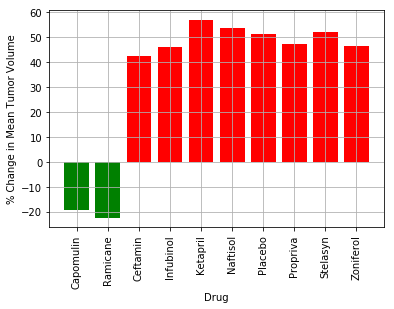

In [15]:

passing = pct_change.loc[ pct_change < 0 ]
failing = pct_change.loc[ pct_change >= 0 ]

colors = ('green',)*len(passing) + ('red',)*len(failing)
xvals = np.arange( len(passing) + len(failing) )
scores = passing.append(failing)
labels = list(passing.index.append(failing.index))

# generate figure
plt.grid()
plt.bar((xvals-0.5), scores, color=colors)
plt.xticks(xvals-0.5, labels, rotation=90)
plt.xlabel('Drug')
plt.ylabel('% Change in Mean Tumor Volume')
# Save the Figure
plt.savefig('vol-change_bar.png')

# Show the Figure
plt.show()